In [1]:
# Define ticket
ticket = 'AAPL'

# Use a new working directory for relative imports
from sys import path
import os

os.chdir(os.path.dirname(path[0]))
# print("New Working Directory " , os.getcwd())

In [2]:
from day_trading.files import DayTradingFiles
from day_trading.dataset import DayTradingDataset
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor,
    BayesianRidge, Ridge, Lasso
)
from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import TheilSenRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import os

# Prepare the models, targets, and features
files = DayTradingFiles()
dataset = DayTradingDataset()

(
    features_train_df, target_high_train, target_low_train,
    features_test_df, target_high_test, target_low_test
) = dataset.test_train_split(ticket)


estimators = (
    ('LinearRegression', LinearRegression()),
    ('TheilSenRegressor', TheilSenRegressor()),
    ('RANSACRegressor', RANSACRegressor()),
    ('BayesianRidge', BayesianRidge()),
    ('Ridge', Ridge())
)

high_regressor = LinearRegression()
low_regressor = LinearRegression()

# Train the models
high_regressor.fit(features_train_df, target_high_train)
low_regressor.fit(features_train_df, target_low_train)

Getting the data for the ticket
Getting data for AAPL
Convert the HTTP response into a pandas DataFrame
Processing data for AAPL
Processing data for AAPL
Processing data for AAPL
There are 6790 data points.
Calculating the cummulative features.
Defining the targets.
# Samples with NaN: 6790
# Samples without NaN: 6733
Two weeks ago: 2022-10-31 18:53:18.447031
Defining the training data.
Defining the test data.


LinearRegression()

In [3]:
import numpy as np

# Feature importance
sorted_idx = np.argsort(high_regressor.coef_)[::-1]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], high_regressor.coef_[index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_regressor.coef_)[::-1]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], low_regressor.coef_[index]])

"""
sorted_idx = np.argsort(high_regressor.feature_importances_)[::-1]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], high_regressor.feature_importances_[index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_regressor.feature_importances_)[::-1]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], low_regressor.feature_importances_[index]])
"""

Feature Importance for high regressor:
['VWAP', 311.84875261595596]
['close', 0.9662776059656102]
['high', 0.3099104539126608]
['MACD_Signal', 0.14208371014208535]
['Resistance_13', 0.05932824851813298]
['Support_3', 0.012446257299644744]
['hour', 0.01221049597188668]
['Support_55', 0.002072016383217603]
['minute', 0.0019971139504590977]
['day_of_week', 0.0018436377363160584]
['Resistance_34', 0.0001664950324166881]
['volume', 7.953055470725181e-08]
['RSI', -0.0020466809768217753]
['Support_21', -0.007116773074240726]
['MACD', -0.0089036901267623]
['Support_34', -0.02105175802359862]
['Support_13', -0.021428656589159968]
['Resistance_21', -0.02356672024552795]
['Resistance_55', -0.028227625773898188]
['Resistance_3', -0.03310703488279815]
['open', -0.06157145941203323]
['MACD_Histogram', -0.1509874002227439]
['low', -0.15757410233457048]
--------------------------------------
Feature Importance for low regressor:
['close', 1.1576612579436205]
['MACD_Histogram', 0.18973108178321]
['MACD

"\nsorted_idx = np.argsort(high_regressor.feature_importances_)[::-1]\nprint(f'Feature Importance for high regressor:')\nfor index in sorted_idx:\n    print([features_test_df.columns[index], high_regressor.feature_importances_[index]])\n\nprint('--------------------------------------')\nsorted_idx = np.argsort(low_regressor.feature_importances_)[::-1]\nprint(f'Feature Importance for low regressor:')\nfor index in sorted_idx:\n    print([features_test_df.columns[index], low_regressor.feature_importances_[index]])\n"

In [4]:
# Make predictions
high_predictions = high_regressor.predict(features_test_df)
low_predictions = low_regressor.predict(features_test_df)

print(f'Sample High Predictions: {high_predictions[:20]}')

Sample High Predictions: [153.97633568 153.46642665 153.35260872 153.4261151  153.34373524
 153.54351778 153.68030814 153.80831148 153.903454   153.8221572
 153.56776932 153.44480648 154.13632389 155.49084888 154.94178685
 154.76359956 154.04038755 153.60317769 153.31939411 152.37841239]


In [5]:
from sklearn.metrics import mean_absolute_error

low_mae = mean_absolute_error(target_low_test, low_predictions)
high_mae = mean_absolute_error(target_high_test, high_predictions)

print(f'MAE Low: {low_mae}')
print(f'MAE High: {high_mae}')

MAE Low: 0.31520557522270254
MAE High: 0.31174569565008253


Sample High Deltas: [-0.40632835 -0.10642604 -0.10761361 -0.03611571  0.10626171  0.04148893
 -0.08030204 -0.20830538 -0.3034479  -0.30215292  1.88222763  2.00519047
  1.31367306 -0.48085437 -0.29179295 -0.76359956 -0.5304846  -0.4367806
 -0.32938861 -0.34841361]


<AxesSubplot:xlabel='x', ylabel='delta_high'>

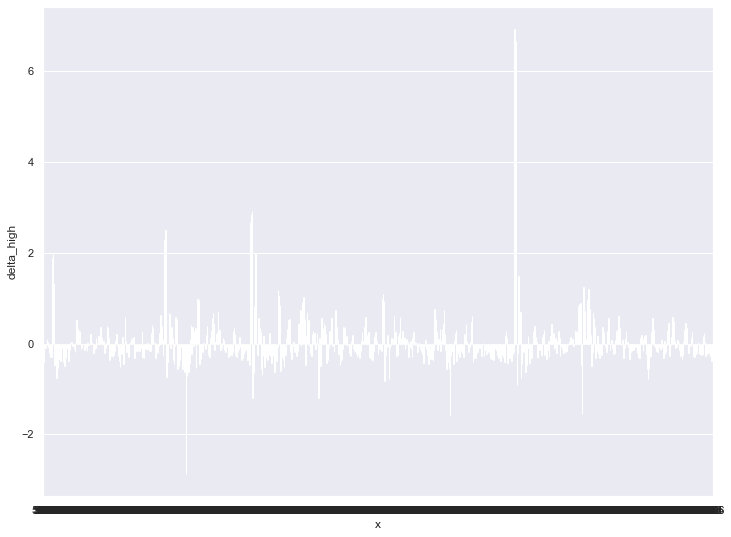

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 9)})

# Analyze the errors
delta_high_values = target_high_test - high_predictions
delta_low_values = target_low_test - low_predictions

df = features_test_df.copy()
df['x'] = df.index
df['delta_low'] = delta_low_values
df['delta_high'] = delta_high_values
df['target_low'] = target_low_test
df['targets_high'] = target_high_test
df['high_predictions'] = high_predictions
df['low_predictions'] = low_predictions

print(f'Sample High Deltas: {delta_high_values[:20]}')

sns.barplot(data=df, x="x", y="delta_high")

<AxesSubplot:xlabel='x', ylabel='delta_low'>

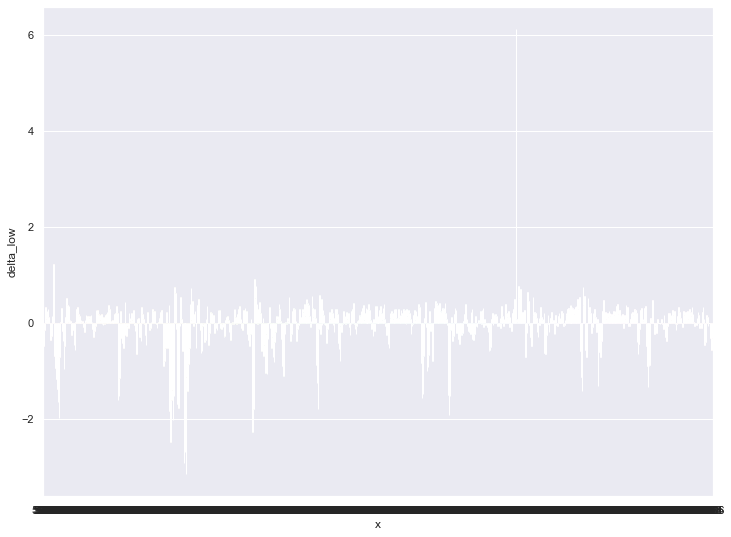

In [7]:
sns.barplot(data=df, x="x", y="delta_low")

In [8]:
df.describe()

,high,low,close,open,volume,day_of_week,hour,minute,Support_3,Resistance_3,...,MACD_Signal,MACD_Histogram,VWAP,x,delta_low,delta_high,target_low,targets_high,high_predictions,low_predictions
count,791.000000,791.000000,791.000000,791.000000,7.910000e+02,791.000000,791.000000,791.000000,791.000000,791.000000,...,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,143.400785,142.949191,143.173822,143.182460,1.058763e+06,1.972187,16.857143,28.609355,142.747944,143.610447,...,0.031067,0.000362,0.000165,6391.000000,-0.033834,0.018746,142.729644,143.591926,143.573180,142.763478
std,5.618394,5.622506,5.621122,5.621319,8.875261e+05,1.424642,1.949637,17.227822,5.632418,5.613886,...,0.485057,0.147806,0.000002,228.486323,0.526190,0.607927,5.606594,5.587458,5.602039,5.641207
min,134.736801,134.380005,134.563904,134.559998,9.911600e+04,0.000000,13.000000,0.000000,134.380005,135.020004,...,-1.685861,-0.795845,0.000163,5996.000000,-3.149130,-2.874890,134.380005,135.020004,134.922307,134.031798
25%,138.305000,137.652496,137.909546,137.925003,6.074265e+05,1.000000,15.000000,15.000000,137.315498,138.575005,...,-0.275723,-0.067788,0.000164,6193.500000,-0.155813,-0.236068,137.315498,138.575005,138.504221,137.432132
50%,142.839996,142.009995,142.639999,142.339996,8.108030e+05,2.000000,17.000000,30.000000,141.770004,143.162003,...,0.006592,-0.010022,0.000164,6391.000000,0.077654,-0.075224,141.770004,143.162003,143.055587,141.793177
75%,149.169945,148.809998,148.990005,148.989952,1.197130e+06,3.000000,19.000000,45.000000,148.701004,149.279999,...,0.269600,0.064611,0.000167,6588.500000,0.237557,0.146100,148.699997,149.270004,149.297813,148.702828
max,155.449997,154.520004,154.729996,155.080002,1.009988e+07,4.000000,20.000000,55.000000,154.039993,155.449997,...,1.848543,0.573227,0.000168,6786.000000,6.113462,6.923696,154.039993,155.449997,155.490849,154.176133


In [9]:
print(df.tail(10))

            high         low       close        open  volume  day_of_week  \
6777  149.860001  149.550003  149.839996  149.550003  677726            0   
6778  150.159897  149.791595  149.819901  149.850006  751664            0   
6779  149.880005  149.220001  149.333206  149.819901  832197            0   
6780  149.360001  149.110001  149.318604  149.335007  822057            0   
6781  149.470001  149.270004  149.413803  149.320007  606592            0   
6782  149.509995  149.309998  149.320007  149.419998  506371            0   
6783  149.434998  149.100006  149.110001  149.311600  661741            0   
6784  149.289993  149.035004  149.264999  149.104996  649433            0   
6785  149.350006  149.000000  149.036499  149.270004  620812            0   
6786  149.059998  148.731995  148.809998  149.039993  809638            0   

      hour  minute   Support_3  Resistance_3  ...  MACD_Signal  \
6777    20       0  149.500000    149.860001  ...    -0.188309   
6778    20       5  

In [10]:
table = pd.pivot_table(
    df, values='delta_low', index=['hour'],
    columns=['day_of_week'], aggfunc=np.mean)
print(table)

print('------------------------------------------------------------------------')

table = pd.pivot_table(
    df, values='delta_low', index=['hour'],
    columns=['minute'], aggfunc=np.mean)
print(table)

day_of_week         0         1         2         3         4
hour                                                         
13                NaN -1.303535 -0.132616 -0.469523 -0.249921
14           0.019745 -0.123844 -0.012868  0.179230 -0.177018
15          -0.007684  0.079544 -0.103484 -0.094730 -0.046416
16          -0.022993  0.119617 -0.001925  0.062020 -0.162283
17           0.098035  0.092689 -0.037301 -0.082147  0.123668
18           0.119562 -0.194133 -0.450505  0.092257  0.226985
19           0.119616 -0.100620 -0.529795  0.043336 -0.069443
20           0.040686 -0.242846  0.663651 -0.001803 -0.141345
------------------------------------------------------------------------
minute        0         5         10        15        20        25        30  \
hour                                                                           
13           NaN       NaN       NaN       NaN       NaN       NaN -0.964396   
14     -0.229490  0.118254  0.147903  0.032141 -0.135228 -0.451485 

In [11]:
table = pd.pivot_table(
    df, values='delta_high', index=['hour'],
    columns=['day_of_week'], aggfunc=np.mean)
print(table)

day_of_week         0         1         2         3         4
hour                                                         
13                NaN -0.472150 -0.026315 -0.248919  0.409194
14          -0.046214 -0.279352 -0.066213  0.145063  0.090878
15          -0.015508  0.078086 -0.110361 -0.126819  0.017737
16           0.038793  0.017759  0.002905  0.103617  0.023411
17          -0.050315  0.004319  0.250327 -0.051786  0.025999
18          -0.036008 -0.076924 -0.092838 -0.017129  0.263778
19           0.075247 -0.060545 -0.344389  0.223525 -0.083939
20           0.035860 -0.153100  1.510000  0.129648 -0.127004


In [12]:
print(df.groupby('hour')['delta_high'].mean())
print(df.groupby('hour')['delta_high'].std())

hour
13   -0.084548
14   -0.030093
15   -0.031373
16    0.037297
17    0.035709
18    0.007811
19   -0.027723
20    0.244335
Name: delta_high, dtype: float64
hour
13    0.747101
14    0.476683
15    0.313052
16    0.321245
17    0.424597
18    0.308832
19    0.628493
20    1.459523
Name: delta_high, dtype: float64


In [13]:
print(df.groupby('hour')['delta_low'].mean())
print(df.groupby('hour')['delta_low'].std())

hour
13   -0.538899
14   -0.026001
15   -0.034554
16   -0.001113
17    0.038989
18   -0.039838
19   -0.086745
20    0.060385
Name: delta_low, dtype: float64
hour
13    0.941847
14    0.429114
15    0.289221
16    0.302056
17    0.241364
18    0.543893
19    0.647794
20    0.908443
Name: delta_low, dtype: float64
